<a href="https://colab.research.google.com/github/claireshort4/NetPyNE-course/blob/main/Connections_Tutorial_Part_3_Recurrent_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Networks tutorial 3

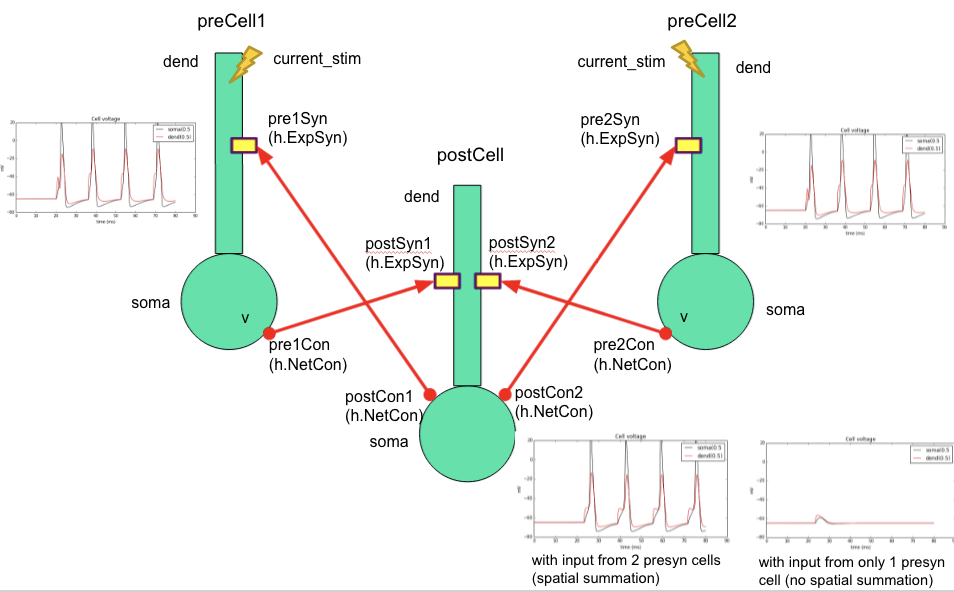

#Installing and Importing the Neuron simulator

In [ ]:
!pip install --upgrade neuron

from neuron import h, gui
from matplotlib import pyplot as plt

Requirement already up-to-date: neuron in /usr/local/lib/python3.7/dist-packages (8.0.0)


# Defining a Class structure to create a Cell model 

In [ ]:
class HHCell: 
    """Two-section cell: A soma with active channels and
    a dendrite with passive properties."""
    def __init__(self):
        self.create_sections()
        self.build_topology()
        self.define_geometry()
        self.define_biophysics()

    def create_sections(self):
        """Create the sections of the cell."""
        self.soma = h.Section(name='soma')
        self.dend = h.Section(name='dend')
    
    def build_topology(self):
        """Connect the sections of the cell"""
        self.dend.connect(self.soma(1))
    
    def define_geometry(self):
        """Set the 3D geometry of the cell."""
        self.soma.L = self.soma.diam = 12.6157 # microns
        self.dend.L = 200                      # microns
        self.dend.diam = 1                     # microns
        self.dend.nseg = 10
    
    def define_biophysics(self):
        """Assign the membrane properties across the cell."""
        for sec in [self.soma, self.dend]: # 
            sec.Ra = 100    # Axial resistance in Ohm * cm
            sec.cm = 1      # Membrane capacitance in micro Farads / cm^2
        
        # Insert active Hodgkin-Huxley current in the soma
        self.soma.insert(h.hh)
        self.soma.gnabar_hh = 0.12  # Sodium conductance in S/cm2
        self.soma.gkbar_hh = 0.036  # Potassium conductance in S/cm2
        self.soma.gl_hh = 0.0003    # Leak conductance in S/cm2
        self.soma.el_hh = -54.3     # Reversal potential in mV
        
        # Insert passive current in the dendrite
        self.dend.insert(h.pas)
        self.dend.g_pas = 0.001  # Passive conductance in S/cm2
        self.dend.e_pas = -65    # Leak reversal potential mV

    def add_current_stim(self, delay):
        self.stim = h.IClamp(self.dend(1.0))
        self.stim.amp = 0.3  # input current in nA
        self.stim.delay = delay  # turn on after this time in ms
        self.stim.dur = 1  # duration of 1 ms
    
    def set_recording(self):
        """Set soma, dendrite, and time recording vectors on the cell. """
        self.soma_v_vec = h.Vector()   # Membrane potential vector at soma
        self.dend_v_vec = h.Vector()   # Membrane potential vector at dendrite
        self.t_vec = h.Vector()        # Time stamp vector
        self.soma_v_vec.record(self.soma(0.5)._ref_v)
        self.dend_v_vec.record(self.dend(0.5)._ref_v)
        self.t_vec.record(h._ref_t)

    def plot_voltage(self, cellname):
        """Plot the recorded traces"""
        plt.figure(figsize=(8,4)) # Default figsize is (8,6)
        plt.plot(self.t_vec, self.soma_v_vec, color='black', label='soma(0.5')
        plt.plot(self.t_vec, self.dend_v_vec, color='red', label='dend(0.5)')
        plt.legend()
        plt.xlabel('time (ms)')
        plt.ylabel('mV')
        plt.ylim(-80,20)
        plt.title('Cell voltage of %s' % (cellname))
        plt.show()

**Previous code:**

In [ ]:
preCell1 = HHCell()   # create presyn cell 1
preCell1.add_current_stim(20)  # add stimulation
preCell1.set_recording()  # setup recording

preCell2 = HHCell()  # create presyn cell 2
preCell2.add_current_stim(20)  # add stimulation
preCell2.set_recording()  # setup recording

postCell = HHCell()  # create postsyn cell
postCell.set_recording()  # setup recording


**The aim of this exercise is to connect the postsynaptic cell to the 2 presynaptic cells so that we create a loop and they keep firing forever (see diagram at the top)**

**1) Adjust the parameters to make both synapses excitatory, and so that the postsynaptic cell fires due to spatial summation (ie. requires input from BOTH presynaptic cells to fire; input from just 1 of them should generate an EPSP but not a spike)**

In [ ]:
postSyn1 = h.ExpSyn(postCell.dend(0.5)) # add exc synapse
postSyn1.e = 0
postSyn1.tau = 2

postSyn2 = h.ExpSyn(postCell.dend(0.5))  # add inh synapse
postSyn2.e = -80
postSyn2.tau = 2

**2) Add an excitatory synapse to each of the presynaptic cells, at location 0.5 of the dendrite, with tau of 2 ms.**

In [ ]:
# pre1Syn = 



# pre2Syn = 



**Code from previous exercise to connect the presynaptic cells to the postsynaptic cell**

In [ ]:
pre1Con = h.NetCon(preCell1.soma(0.5)._ref_v, postSyn1, sec=preCell1.soma)
pre1Con.weight[0] = 0.002
pre1Con.delay = 1

pre2Con = h.NetCon(preCell2.soma(0.5)._ref_v, postSyn2, sec=preCell2.soma)
pre2Con.weight[0] = 0.002
pre2Con.delay = 1

**3) Add a connection from the postsynaptic cell soma to the each of the presynaptic cells (using the synapses created in step 3), each with delay of 10 ms.**

In [ ]:
# postCon1 = 



# postCon2 = 



**4) Run simulation for 80 ms and plot the voltage of all 3 cells**


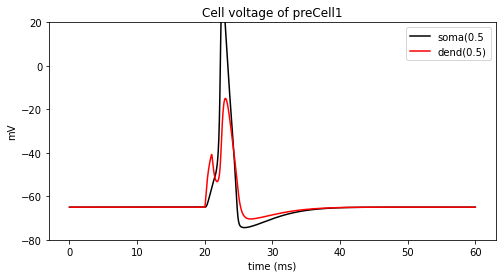

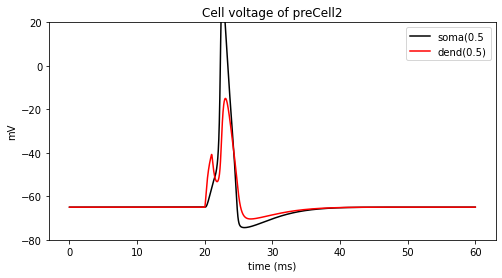

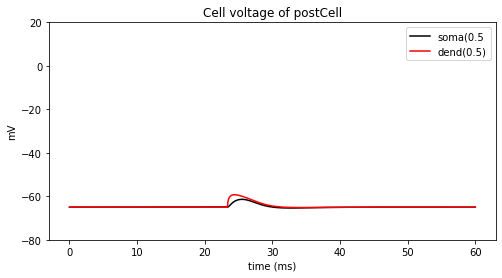

In [ ]:
h.finitialize(-65)
h.continuerun(60)

preCell1.plot_voltage('preCell1')
preCell2.plot_voltage('preCell2')
postCell.plot_voltage('postCell')

**5) Adjust the weights as necessary to obtain 4 spikes in all 3 cells as shown in the figure at the top.** 

**Make sure that step 1) still holds true: ie. if you set to 0 the weight of either of the presynpatic cells to the postsynaptic, then the 4 spikes should no longer be there.**